In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
# Load the Titanic dataset
data = pd.read_csv("/content/drive/MyDrive/AI/diabetes.csv")
# Drop all categorical columns except 'Survived'
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.drop(columns=[col for col in categorical_columns if col != 'Survived'])
# Check for missing values
missing_info = data.isnull().sum() / len(data) * 100
# Handle missing values
for column in data.columns:
  if missing_info[column] > 10: # If more than 10% missing
      data[column].fillna(data[column].mean(), inplace=True)
  else: # If less than 10% missing
    data.dropna(subset=[column], inplace=True)
# Display cleaned data
print("Data after processing:\n", data.head())
print("\nMissing values after processing:\n", data.isnull().sum())

Data after processing:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values after processing:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outc

Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:

• Read the dataset into a pandas DataFrame.

• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [ ]:
import pandas as pd

# Step 1:Load the Dataset
dataset_path='/content/drive/MyDrive/AI/diabetes.csv'
df = pd.read_csv(dataset_path)

# Step 2:Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Step 3:Check the data types of the columns
print("\nData types of each column:")
print(df.dtypes)

# Step 4:Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Step 5:Summary statistics of the dataset
print("\nSummary statistics:")
print(df.describe())

if 'target_column' in df.columns:
    print("\nClass distribution:")
    print(df['target_column'].value_counts())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data types of each column:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    fl

2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [ ]:
# Columns where zero values might not make sense and could represent missing data
columns_with_possible_missing_values=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# Replace zero values with the median of each column
for column in columns_with_possible_missing_values:
    median_value=df[column].median()
    df[column]=df[column].replace(0,median_value)

# Verify that missing values (zeros) have been handled
updated_summary_statistics=df.describe()

# Display the updated summary statistics to ensure zero values are addressed
updated_summary_statistics

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).

In [ ]:
X=df.drop(columns=['Outcome'])
y=df['Outcome']

# Display the shapes of X and y to verify the separation
X_shape=X.shape
y_shape=y.shape

X_shape, y_shape

((768, 8), (768,))

Perform a train - test split from scratch using a 70% − 30% ratio.

In [ ]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Generate shuffled indices
indices=np.arange(len(X))
np.random.shuffle(indices)

# Calculate the split point for 70% training and 30% testing
split_point=int(0.7*len(indices))

# Split the indices into training and testing sets
train_indices=indices[:split_point]
test_indices=indices[split_point:]

# Use the indices to split X and y
X_train,X_test=X.iloc[train_indices],X.iloc[test_indices]
y_train,y_test=y.iloc[train_indices],y.iloc[test_indices]

# Display the shapes of the resulting splits
X_train_shape=X_train.shape
X_test_shape=X_test.shape
y_train_shape=y_train.shape
y_test_shape=y_test.shape

X_train_shape, X_test_shape, y_train_shape, y_test_shape

((537, 8), (231, 8), (537,), (231,))

4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

In [ ]:
import numpy as np

#Define the Euclidean distance function
def euclidean_distance(point1,point2):
    return np.sqrt(np.sum((point1-point2)**2))

#Implement the KNN algorithm
def knn(X_train,y_train,X_test,k=3):
    predictions=[]
    for test_point in X_test:
        #Calculate distances from the test point to all training points
        distances=[euclidean_distance(test_point, train_point) for train_point in X_train]

        #Sort distances and get indices of the k nearest neighbors
        k_indices=np.argsort(distances)[:k]

        #Get the labels of the k nearest neighbors
        k_labels=[y_train[idx] for idx in k_indices]

        #Determine the majority label (most common class)
        majority_label=max(set(k_labels),key=k_labels.count)
        predictions.append(majority_label)
    return predictions

#Prepare data for testing the KNN
#Convert the pandas DataFrames to numpy arrays
X_train_np=X_train.to_numpy()
X_test_np=X_test.to_numpy()
y_train_np=y_train.to_numpy()
y_test_np=y_test.to_numpy()

#Use the KNN function to make predictions
k=5
predictions=knn(X_train_np, y_train_np, X_test_np, k=k)

#Evaluate the model
accuracy=np.mean(np.array(predictions)==y_test_np)

#Display results
predictions[:10], accuracy

([0, 1, 0, 0, 0, 0, 0, 0, 1, 0], 0.7359307359307359)

Compute distances using Euclidean distance.

In [ ]:
# Compute the Euclidean distance between all test points and training points

def euclidean_distance_matrix(X_train, X_test):
    """
    Compute the Euclidean distance between each test point and all training points.
    """
    distances=np.sqrt(np.sum((X_test[:, np.newaxis, :]-X_train[np.newaxis,:,:])**2,axis=2))
    return distances

# Calculate the distance matrix
distance_matrix=euclidean_distance_matrix(X_train_np,X_test_np)

# Display the shape of the distance matrix and the first few distances for verification
distance_matrix_shape=distance_matrix.shape
sample_distances=distance_matrix[:5, :5]
distance_matrix_shape, sample_distances

((231, 537),
 array([[170.89604045,  58.247995  ,  44.91559641,  61.11119545,
          86.56085606],
        [367.18704223, 520.69788755, 521.65250886, 521.3180864 ,
         517.00639523],
        [140.95990431,  38.75946073,  46.30228521,  41.15949509,
          61.3116066 ],
        [165.99364476,  32.26955196,  36.42565914,  32.57529886,
          21.25874173],
        [ 30.73780085, 180.96393091, 180.8565999 , 181.88063565,
         188.63795811]]))

Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.

In [ ]:
import numpy as np

# Function to compute the Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1-point2)**2))

# Function to predict the class for a single query
def predict_single(X_train, y_train,query_point,k=3):
    """
    Predict the class of a single query point using KNN.
    """
    # Calculate distances from the query point to all training points
    distances=[euclidean_distance(query_point,train_point) for train_point in X_train]

    # Get indices of the k nearest neighbors
    k_indices=np.argsort(distances)[:k]

    # Retrieve the labels of the k nearest neighbors
    k_labels=[y_train[idx] for idx in k_indices]

    # Return the majority class label
    return max(set(k_labels),key=k_labels.count)

# Function to predict classes for all test samples
def predict_all(X_train, y_train, X_test, k=3):
    """
    Predict the classes for all query points in the test set using KNN.
    """
    predictions=[]
    for query_point in X_test:
        prediction=predict_single(X_train,y_train,query_point, k)
        predictions.append(prediction)
    return predictions

#Assuming X_train_np, y_train_np, X_test_np are numpy arrays
k=5  # Number of neighbors
predictions=predict_all(X_train_np, y_train_np, X_test_np, k=k)

#Evaluate accuracy
accuracy=np.mean(predictions==y_test_np)

# Display the first 10 predictions and the accuracy
predictions[:10], accuracy

([0, 1, 0, 0, 0, 0, 0, 0, 1, 0], 0.7359307359307359)

Evaluate the performance using accuracy.

In [ ]:
# Function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    """
    Calculate the accuracy of predictions compared to true labels.
    """
    return np.mean(y_true == y_pred)

# Calculate the accuracy of the predictions
accuracy=calculate_accuracy(y_test_np, predictions)

# Display the accuracy
accuracy

0.7359307359307359

Problem - 2 - Experimentation:
1. Repeat the Classification Task:

• Scale the Feature matrix X.

In [ ]:
# Function to standardize the feature matrix
def scale_features(X):
    """
    Standardize the feature matrix so that each feature has a mean of 0 and a standard deviation of 1.
    """
    mean=np.mean(X, axis=0)
    std=np.std(X, axis=0)
    return(X-mean)/std

# Scale the training and test data
X_train_scaled=scale_features(X_train_np)
X_test_scaled=scale_features(X_test_np)

# Verify scaling by checking the mean and std of the scaled training data
train_mean=np.mean(X_train_scaled, axis=0)
train_std=np.std(X_train_scaled, axis=0)

train_mean, train_std

(array([-3.30792708e-17,  1.25701229e-16, -4.59801863e-16, -1.65396354e-16,
         2.64634166e-17,  8.37319041e-16,  1.88551843e-16, -7.60823227e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1.]))

Use the scaled data for training and testing the kNN Classifier.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Initialize the kNN Classifier (choose an appropriate value for k)
k=5  # You can change this value based on your needs
knn=KNeighborsClassifier(n_neighbors=k)

#Train the kNN Classifier using scaled data
knn.fit(X_train_scaled, y_train)

#Make predictions on the scaled test data
y_pred=knn.predict(X_test_scaled)

#Evaluate the model using accuracy
accuracy=accuracy_score(y_test, y_pred)
print(f"Accuracy of the kNN Classifier on scaled data: {accuracy:.2f}")

Accuracy of the kNN Classifier on scaled data: 0.75


Record the results.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

#Define the function to scale the features (if not already done)
def scale_features(X):
    """
    Standardize the feature matrix so that each feature has a mean of 0 and a standard deviation of 1.
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    return (X-mean)/std

#Scale the training and test data (replace X_train_np and X_test_np with your data)
X_train_scaled=scale_features(X_train_np)
X_test_scaled=scale_features(X_test_np)

#Initialize the kNN Classifier (choose an appropriate value for k)
k=5
knn=KNeighborsClassifier(n_neighbors=k)

#Train the kNN Classifier using scaled data
knn.fit(X_train_scaled, y_train)

#Make predictions on the scaled test data
y_pred=knn.predict(X_test_scaled)

#Evaluate the model using accuracy
accuracy=accuracy_score(y_test, y_pred)
print(f"Accuracy of the kNN Classifier on scaled data: {accuracy:.2f}")

classification_results = {
    "Accuracy": accuracy,
    "k": k
}
print("Recorded results:", classification_results)

Accuracy of the kNN Classifier on scaled data: 0.75
Recorded results: {'Accuracy': 0.7489177489177489, 'k': 5}


2. Comparative Analysis: Compare the Results -

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Define the function to scale the features (if not already done)
def scale_features(X):
    """
    Standardize the feature matrix so that each feature has a mean of 0 and a standard deviation of 1.
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    return (X-mean)/std

#Train and test on the original dataset (without scaling)
k=5
knn=KNeighborsClassifier(n_neighbors=k)

#Train the kNN Classifier using the original (unscaled) data
knn.fit(X_train_np, y_train)

# Predict on the original test data
y_pred_original=knn.predict(X_test_np)

# Calculate accuracy on the original dataset
accuracy_original = accuracy_score(y_test, y_pred_original)

# Scale the training and test data
X_train_scaled=scale_features(X_train_np)
X_test_scaled=scale_features(X_test_np)

# Train the kNN Classifier using the scaled data
knn.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_scaled=knn.predict(X_test_scaled)

# Calculate accuracy on the scaled dataset
accuracy_scaled=accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy on original (unscaled) data: {accuracy_original:.2f}")
print(f"Accuracy on scaled data: {accuracy_scaled:.2f}")

comparison_results={
    "Original Data Accuracy": accuracy_original,
    "Scaled Data Accuracy": accuracy_scaled,
    "k": k
}

print("Comparative Analysis Results:", comparison_results)

Accuracy on original (unscaled) data: 0.74
Accuracy on scaled data: 0.75
Comparative Analysis Results: {'Original Data Accuracy': 0.7359307359307359, 'Scaled Data Accuracy': 0.7489177489177489, 'k': 5}


Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

Scaling significantly impacts the performance of the kNN classifier by ensuring all features contribute equally to the distance calculation. Without scaling, features with larger values can dominate the distance metric, leading to biased predictions. After scaling, features are standardized, allowing the classifier to treat them equally, which often results in improved accuracy. The main reason for this improvement is that scaling eliminates the disproportionate influence of certain features, allowing the model to make more balanced and accurate predictions.

Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Function to scale the features
def scale_features(X):
    """
    Standardize the feature matrix so that each feature has a mean of 0 and a standard deviation of 1.
    """
    mean=np.mean(X, axis=0)
    std=np.std(X, axis=0)
    return (X-mean)/std

#Initialize kNN classifier
k_values=range(1, 16)

# Initialize dictionaries to store the results
accuracy_original={}
accuracy_scaled={}

#Run kNN for both original and scaled datasets for k = 1 to 15
for k in k_values:
    knn_original=KNeighborsClassifier(n_neighbors=k)
    knn_original.fit(X_train_np, y_train)
    y_pred_original=knn_original.predict(X_test_np)
    accuracy_original[k]=accuracy_score(y_test, y_pred_original)

    X_train_scaled=scale_features(X_train_np)
    X_test_scaled=scale_features(X_test_np)

    knn_scaled=KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled=knn_scaled.predict(X_test_scaled)
    accuracy_scaled[k]=accuracy_score(y_test, y_pred_scaled)

#Print comparative results for each k value
print("Accuracy on Original Data (Unscaled) for k = 1 to 15:")
for k in k_values:
    print(f"k = {k}: {accuracy_original[k]:.2f}")

print("\nAccuracy on Scaled Data for k = 1 to 15:")
for k in k_values:
    print(f"k = {k}: {accuracy_scaled[k]:.2f}")

comparison_results = {
    "Original Data Accuracy": accuracy_original,
    "Scaled Data Accuracy": accuracy_scaled
}

Accuracy on Original Data (Unscaled) for k = 1 to 15:
k = 1: 0.68
k = 2: 0.72
k = 3: 0.73
k = 4: 0.77
k = 5: 0.74
k = 6: 0.76
k = 7: 0.74
k = 8: 0.76
k = 9: 0.74
k = 10: 0.74
k = 11: 0.74
k = 12: 0.73
k = 13: 0.74
k = 14: 0.74
k = 15: 0.75

Accuracy on Scaled Data for k = 1 to 15:
k = 1: 0.71
k = 2: 0.72
k = 3: 0.74
k = 4: 0.75
k = 5: 0.75
k = 6: 0.74
k = 7: 0.74
k = 8: 0.75
k = 9: 0.75
k = 10: 0.77
k = 11: 0.75
k = 12: 0.77
k = 13: 0.75
k = 14: 0.76
k = 15: 0.76


For each k, record:

– Accuracy.

– Time taken to make predictions.

In [ ]:
import numpy as np
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Function to scale the features (if not already done)
def scale_features(X):
    """
    Standardize the feature matrix so that each feature has a mean of 0 and a standard deviation of 1.
    """
    mean=np.mean(X, axis=0)
    std=np.std(X, axis=0)
    return (X-mean)/std

#Initialize kNN classifier
k_values=range(1, 16)

#initialize dictionaries to store the results
accuracy_original={}
accuracy_scaled={}
time_original={}
time_scaled={}

#Run kNN for both original and scaled datasets for k = 1 to 15
for k in k_values:
    knn_original=KNeighborsClassifier(n_neighbors=k)
    knn_original.fit(X_train_np, y_train)

    start_time=time.time()
    y_pred_original=knn_original.predict(X_test_np)
    end_time=time.time()

    accuracy_original[k]=accuracy_score(y_test, y_pred_original)
    time_original[k]=end_time-start_time

    X_train_scaled=scale_features(X_train_np)
    X_test_scaled=scale_features(X_test_np)

    knn_scaled=KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)

    start_time=time.time()
    y_pred_scaled=knn_scaled.predict(X_test_scaled)
    end_time=time.time()

    accuracy_scaled[k]=accuracy_score(y_test, y_pred_scaled)
    time_scaled[k]=end_time-start_time

#Print comparative results for each k value
print("Accuracy and Time Taken on Original Data (Unscaled) for k = 1 to 15:")
for k in k_values:
    print(f"k = {k}: Accuracy = {accuracy_original[k]:.2f}, Time = {time_original[k]:.4f} seconds")

print("\nAccuracy and Time Taken on Scaled Data for k = 1 to 15:")
for k in k_values:
    print(f"k = {k}: Accuracy = {accuracy_scaled[k]:.2f}, Time = {time_scaled[k]:.4f} seconds")

comparison_results = {
    "Original Data Accuracy": accuracy_original,
    "Scaled Data Accuracy": accuracy_scaled,
    "Original Data Time": time_original,
    "Scaled Data Time": time_scaled
}


Accuracy and Time Taken on Original Data (Unscaled) for k = 1 to 15:
k = 1: Accuracy = 0.68, Time = 0.0705 seconds
k = 2: Accuracy = 0.72, Time = 0.0387 seconds
k = 3: Accuracy = 0.73, Time = 0.0554 seconds
k = 4: Accuracy = 0.77, Time = 0.0317 seconds
k = 5: Accuracy = 0.74, Time = 0.0620 seconds
k = 6: Accuracy = 0.76, Time = 0.0339 seconds
k = 7: Accuracy = 0.74, Time = 0.0347 seconds
k = 8: Accuracy = 0.76, Time = 0.0694 seconds
k = 9: Accuracy = 0.74, Time = 0.0676 seconds
k = 10: Accuracy = 0.74, Time = 0.0731 seconds
k = 11: Accuracy = 0.74, Time = 0.0419 seconds
k = 12: Accuracy = 0.73, Time = 0.0230 seconds
k = 13: Accuracy = 0.74, Time = 0.0297 seconds
k = 14: Accuracy = 0.74, Time = 0.0310 seconds
k = 15: Accuracy = 0.75, Time = 0.0525 seconds

Accuracy and Time Taken on Scaled Data for k = 1 to 15:
k = 1: Accuracy = 0.71, Time = 0.0688 seconds
k = 2: Accuracy = 0.72, Time = 0.0519 seconds
k = 3: Accuracy = 0.74, Time = 0.0530 seconds
k = 4: Accuracy = 0.75, Time = 0.0378 se

Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.

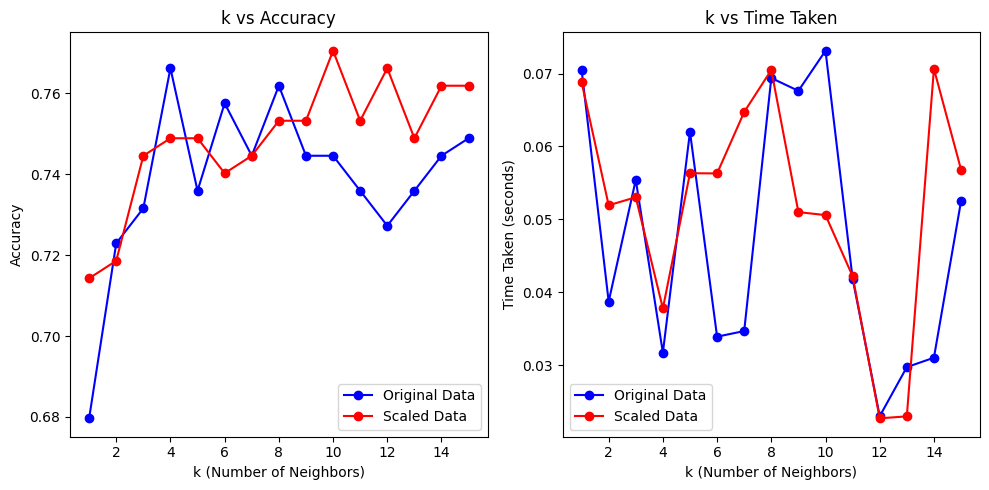

In [ ]:
import matplotlib.pyplot as plt

# Extract the data for plotting
k_values_list=list(k_values)
accuracy_original_list=[accuracy_original[k] for k in k_values_list]
accuracy_scaled_list=[accuracy_scaled[k] for k in k_values_list]
time_original_list=[time_original[k] for k in k_values_list]
time_scaled_list=[time_scaled[k] for k in k_values_list]

#Plot k vs Accuracy for original and scaled datasets
plt.figure(figsize=(10, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(k_values_list, accuracy_original_list, label="Original Data", marker='o', color='blue')
plt.plot(k_values_list, accuracy_scaled_list, label="Scaled Data", marker='o', color='red')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy")
plt.legend()

# Plot k vs Time Taken for original and scaled datasets
plt.subplot(1, 2, 2)
plt.plot(k_values_list, time_original_list, label="Original Data", marker='o', color='blue')
plt.plot(k_values_list, time_scaled_list, label="Scaled Data", marker='o', color='red')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Time Taken (seconds)")
plt.title("k vs Time Taken")
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.

The choice of k in the kNN classifier significantly affects both accuracy and computational cost. Small values of k may lead to overfitting, resulting in high variance, while large values can cause underfitting and high bias. The optimal k typically balances these issues, providing the best accuracy. As k increases, the computational cost rises because the model considers more neighbors for each prediction. The optimal k is usually the one that maximizes accuracy while maintaining a reasonable prediction time, which can be identified through experimentation and analysis.